<a href="https://colab.research.google.com/github/MasudurRahman34/Machine-Learning/blob/clustering/clustering_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 20, 'linewidths':3}

In [5]:
data = np.load('/content/data.npy')

In [6]:
data.shape

(400, 2)

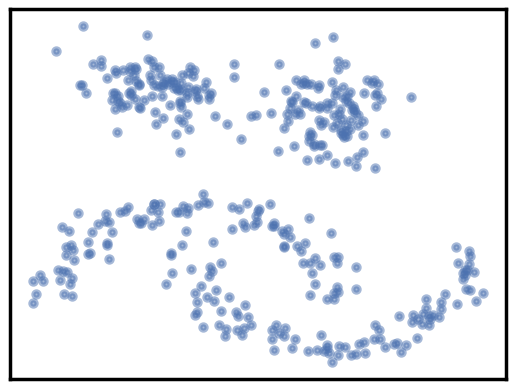

In [7]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


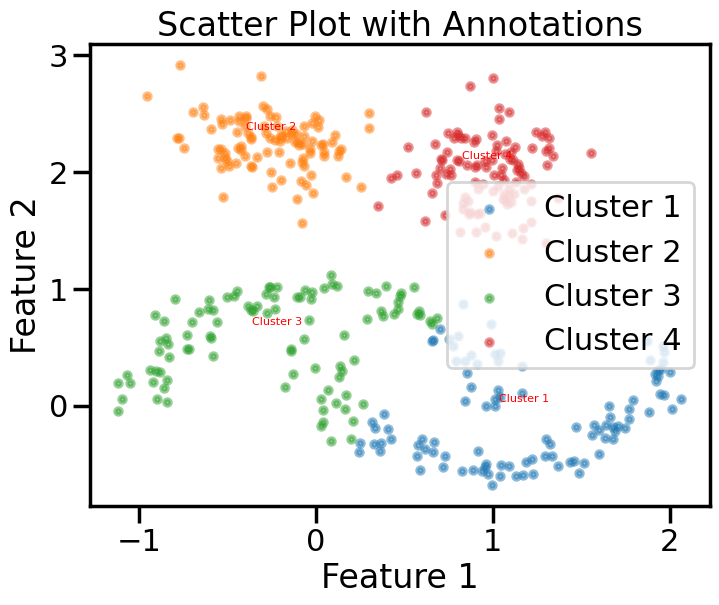

In [8]:
# Set up Seaborn and Matplotlib configurations
from sklearn.cluster import KMeans
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(data)

# Scatter plot with annotations
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
for cluster_label in range(4):
    cluster_points = data[labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label + 1}', **plot_kwds)

# Add annotations to each cluster
for cluster_label in range(4):
    cluster_center = kmeans.cluster_centers_[cluster_label]
    plt.annotate(f'Cluster {cluster_label + 1}', cluster_center,
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red')

# Customize the plot
plt.title('Scatter Plot with Annotations')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


# Show the plot
plt.show()

In [9]:
def plot_clusters(data, algorithm, args, kwds):
 start_time = time.time()
 labels = algorithm(*args, **kwds).fit_predict(data)
 end_time = time.time()
 palette = sns.color_palette('deep', np.unique(labels).max() + 1)
 colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
 plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
 frame = plt.gca()
 frame.axes.get_xaxis().set_visible(False)
 frame.axes.get_yaxis().set_visible(False)
 plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
 plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time),
fontsize=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


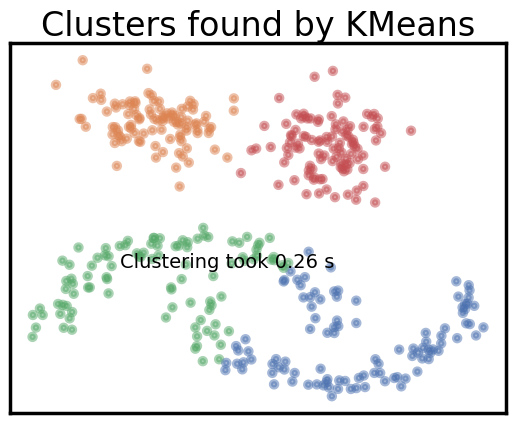

In [10]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4, 'init':'random','algorithm':'elkan','max_iter':500})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


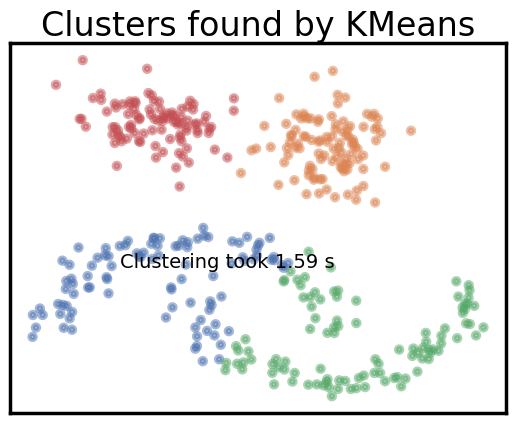

In [11]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4, 'init':'k-means++','algorithm':'elkan','max_iter':500})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


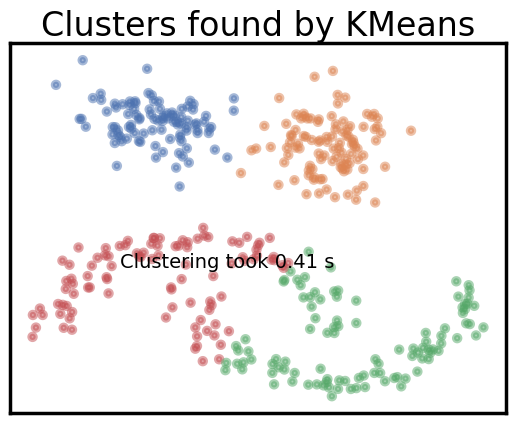

In [12]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4, 'init':'k-means++','algorithm':'lloyd','max_iter':500})

In [13]:
#optimizing best k
wscss=[];
for i in range(1,10):
  kmn=KMeans(n_clusters=i, init='k-means++',algorithm='elkan', max_iter=300)
  kmn.fit_predict(data);
  wscss.append(kmn.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

In [14]:
wscss

[657.4749299152237,
 301.6748637740616,
 182.30884683258682,
 104.73667340448549,
 77.10437772031835,
 60.452148672491006,
 51.71256695194238,
 43.47216737617161,
 38.03438616032402]

Text(0, 0.5, 'wscss')

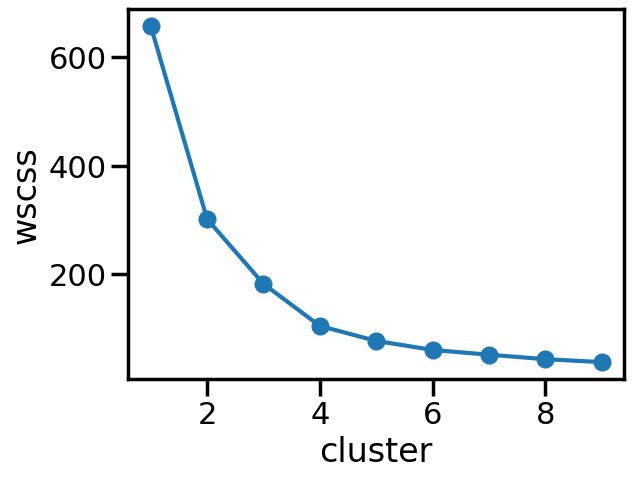

In [15]:
plt.plot(range(1,10),wscss, marker='o')
plt.xlabel('cluster')
plt.ylabel('wscss')

In [16]:
!pip install kneed

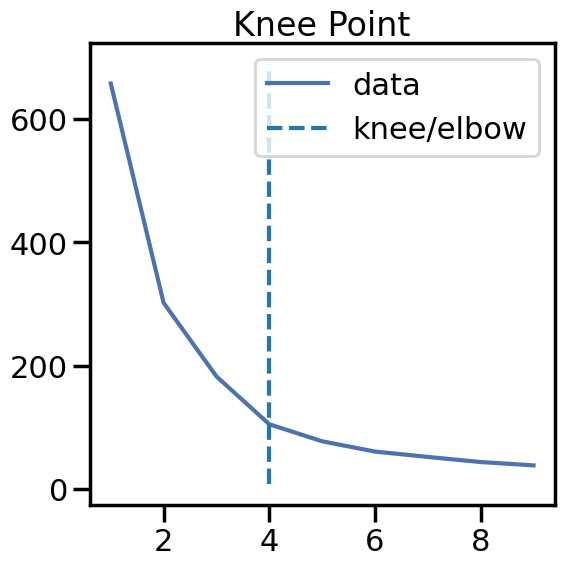

In [17]:
from kneed import KneeLocator
kn=KneeLocator(range(1,10),wscss,curve='convex', direction='decreasing');
kn.plot_knee()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


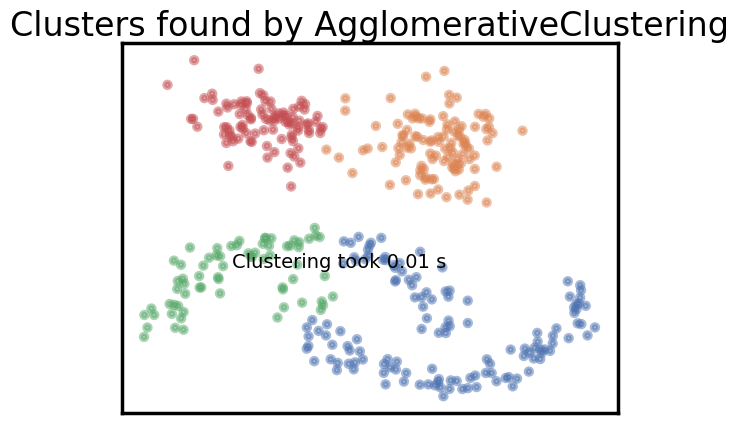

In [18]:
#agglomarative clustering
from sklearn.cluster import AgglomerativeClustering
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':4,'affinity':'euclidean','linkage':'ward'})

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

cophenetic correlation coefficiency 0.7879377690118914


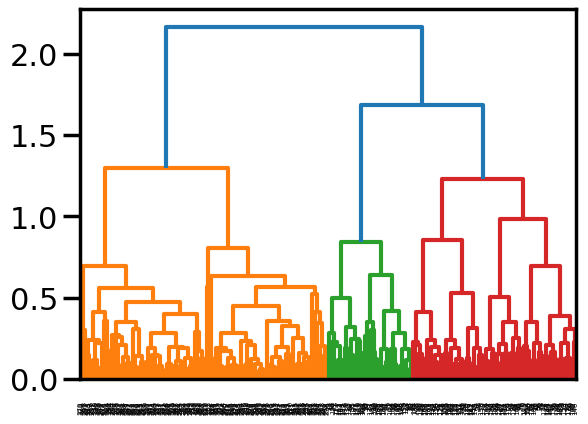

In [20]:
Z = linkage(data, method='average')
c, coph_dists = cophenet(Z, pdist(data))
dendrogram(Z)
print('cophenetic correlation coefficiency', c)

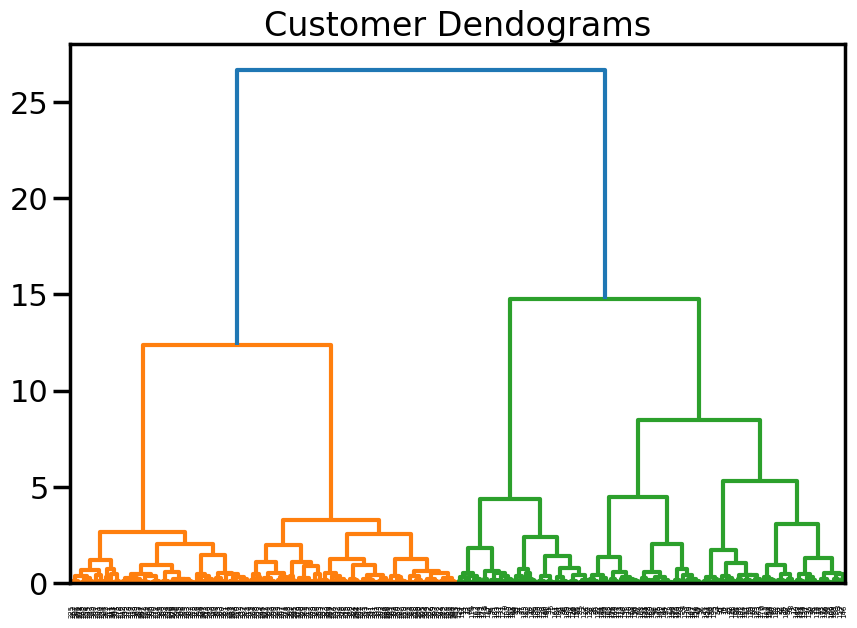

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))



In [22]:
from sklearn.cluster import AffinityPropagation


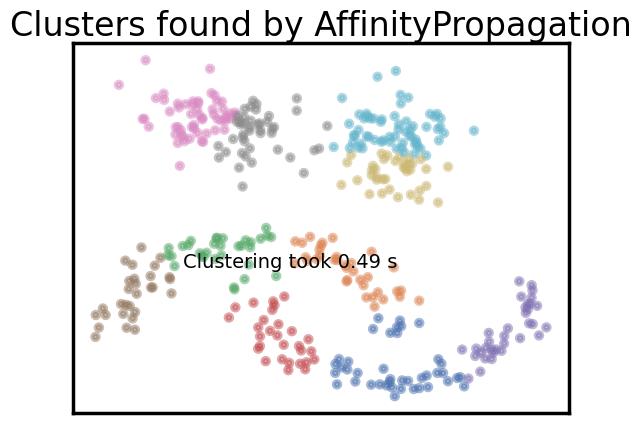

In [23]:
plot_clusters(data, cluster.AffinityPropagation, (), {'damping': 0.5, 'affinity': 'euclidean', 'preference': -6, 'max_iter': 200})


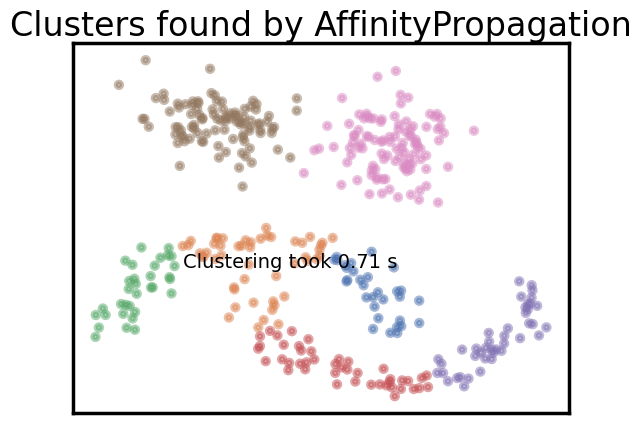

In [24]:
plot_clusters(data, cluster.AffinityPropagation, (), {'damping': 0.5, 'affinity': 'euclidean', 'preference': -10, 'max_iter': 200})


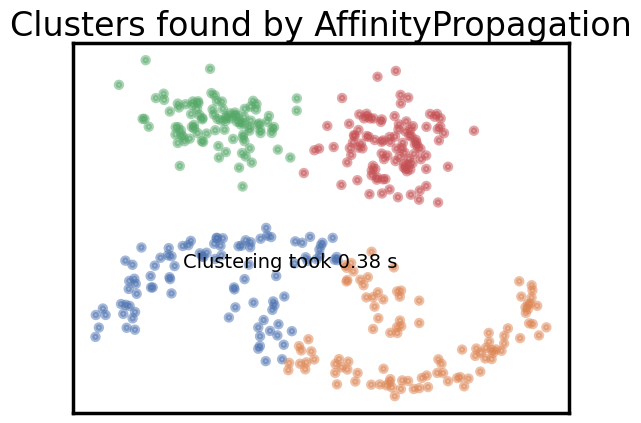

In [25]:
plot_clusters(data, cluster.AffinityPropagation, (), {'damping': 0.95,'affinity':'euclidean','preference': -50, 'max_iter': 200})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Af

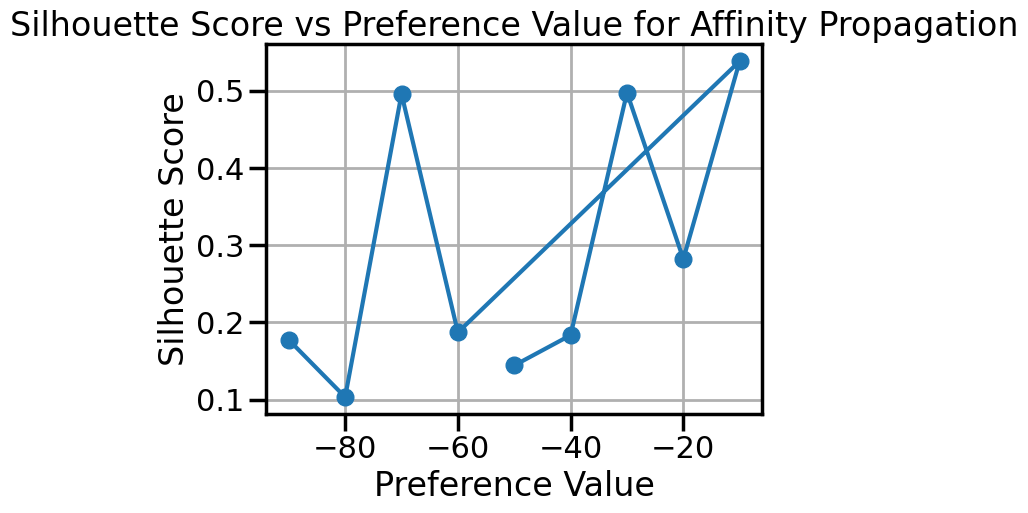

In [26]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

preference_values = [-50, -40, -30, -20, -10, -60, -70, -80, -90]
silhouette_scores = []

for preference_value in preference_values:
    labels = AffinityPropagation(preference=preference_value).fit_predict(data)

    # Check if there are at least two unique labels
    unique_labels = len(set(labels))

    if unique_labels > 1:
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)

plt.plot(preference_values, silhouette_scores, marker='o')
plt.xlabel('Preference Value')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Preference Value for Affinity Propagation')
plt.grid(True)
plt.show()

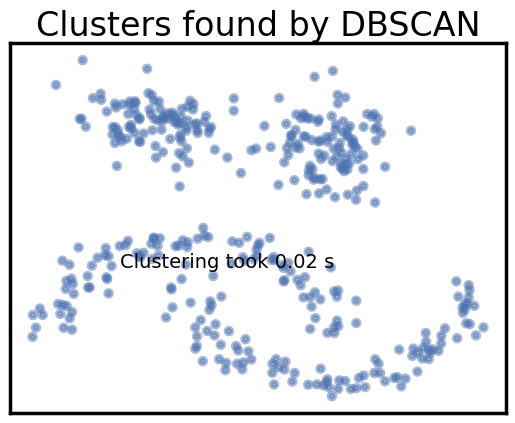

In [108]:
#dbscan
plot_clusters(data, cluster.DBSCAN, (), {'eps': .5, 'min_samples': 5, })

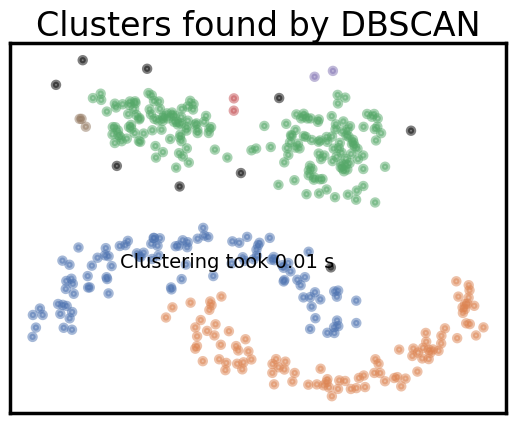

In [80]:
#dbscan
plot_clusters(data, cluster.DBSCAN, (), {'eps': .19, 'min_samples': 2, 'p':2, })

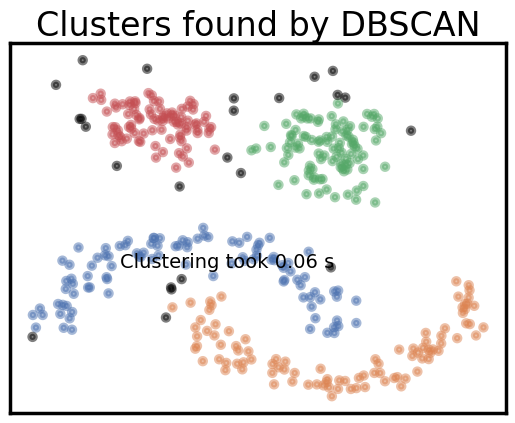

In [106]:
from sklearn.cluster import DBSCAN
plot_clusters(data, cluster.DBSCAN, (), {'eps': .19, 'min_samples': 5, 'algorithm':'brute', 'p':1})

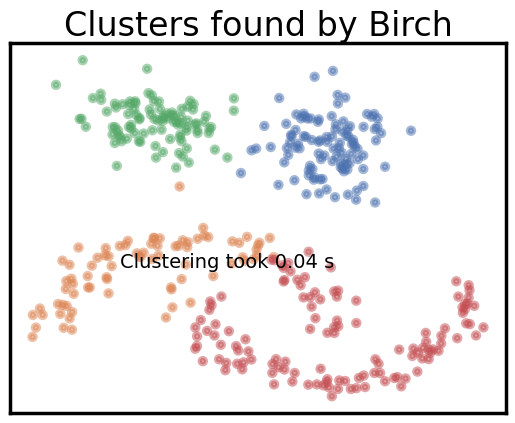

In [29]:
#Example 1: Default Birch parameters
plot_clusters(data, cluster.Birch, (), {'threshold': 1, 'n_clusters': 4})

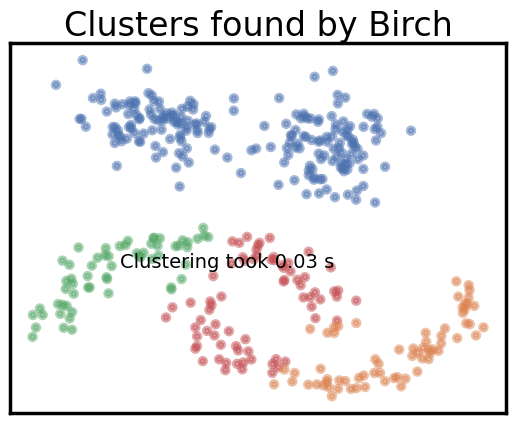

In [30]:
#Example 1: Default Birch parameters
plot_clusters(data, cluster.Birch, (), {'threshold': .5, 'n_clusters': 4, 'branching_factor':100})

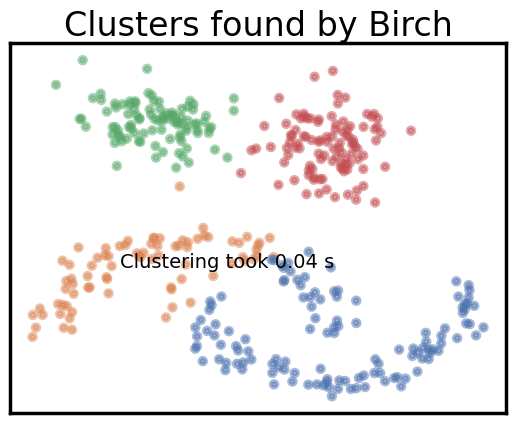

In [31]:
plot_clusters(data, cluster.Birch, (), {'threshold': 1, 'n_clusters': None, 'branching_factor':100})

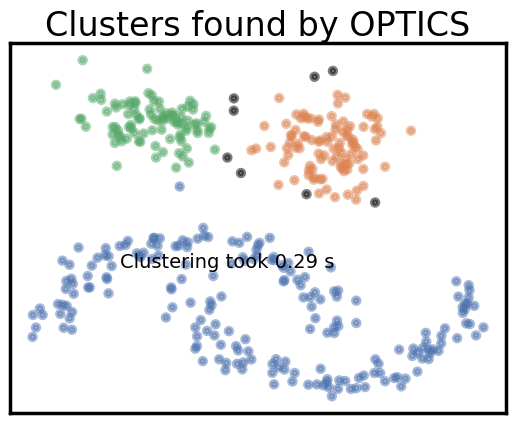

In [32]:
# Example 1: Default OPTICS parameters
plot_clusters(data, cluster.OPTICS, (), {'min_samples': 20, 'xi': .11,'p':2, 'min_cluster_size':4,'algorithm':'ball_tree'})


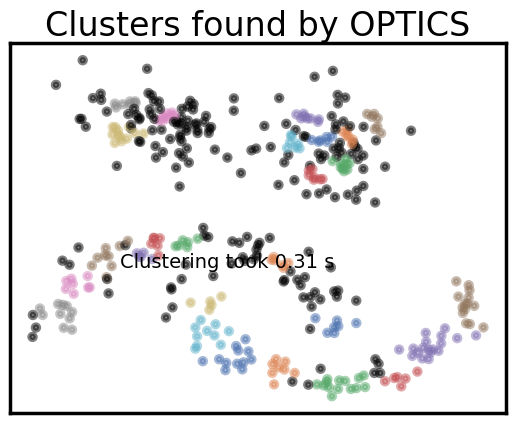

In [33]:
# Example 1: Default OPTICS parameters
plot_clusters(data, cluster.OPTICS, (), {'min_samples': 5, 'xi': .05,'p':2})

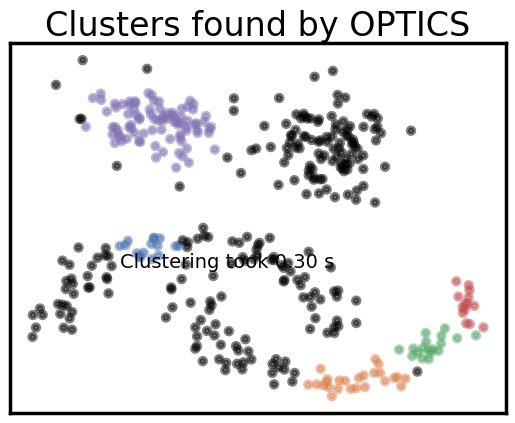

In [34]:
# Example 1: Default OPTICS parameters
plot_clusters(data, cluster.OPTICS, (), {'min_samples': 10, 'xi': .1,'p':1})

In [35]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039271 sha256=7d7e18eaaa0a6e7a178f41a647a7bdcc168a3dbf974dca4a07cad4bc4b590e93
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.7
    Uninstalling Cython-3.0.7:
      Successfully uninstalled Cython-3.0.7


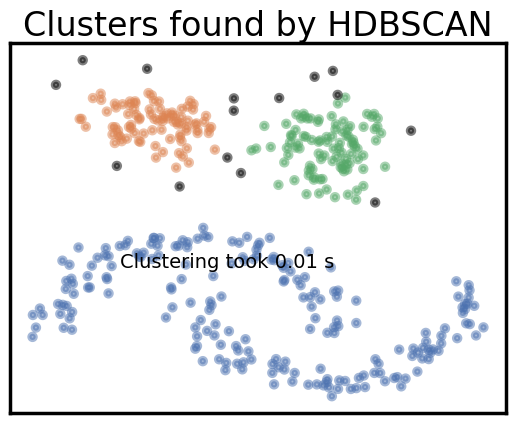

In [36]:
import hdbscan
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 5, 'min_samples': 5})

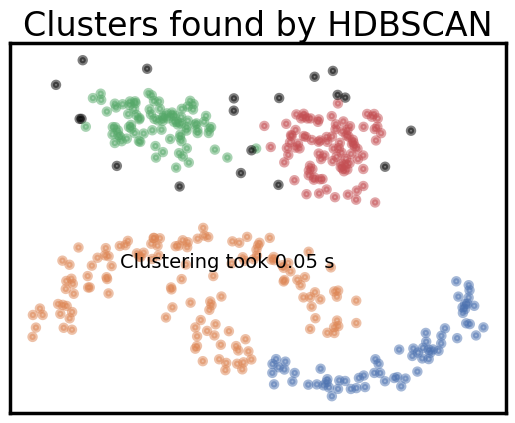

In [124]:
# Example 2: Higher min_cluster_size for larger clusters
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 4, 'min_samples': 4})

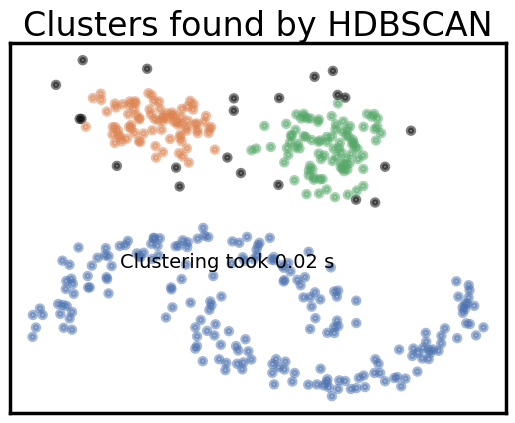

In [38]:
# Example 3: Higher min_samples for denser clusters
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size': 5, 'min_samples': 10})

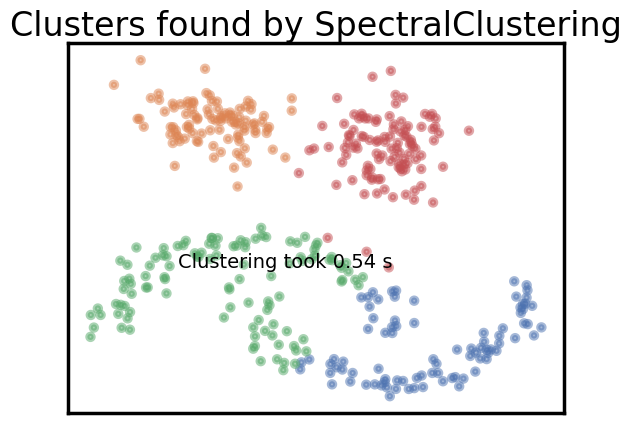

In [39]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters': 4, 'gamma': 1.0})

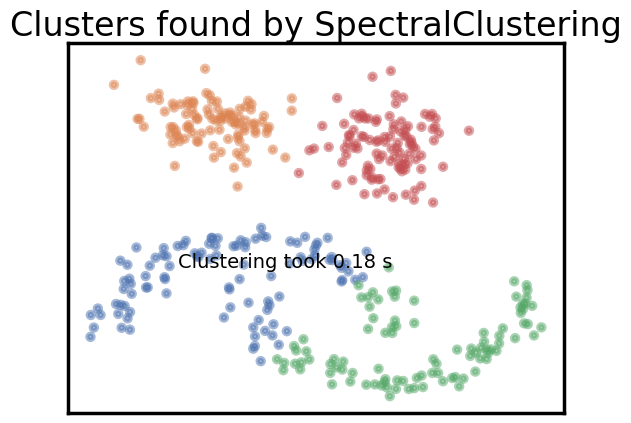

In [40]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters': 4, 'gamma': 2.0})

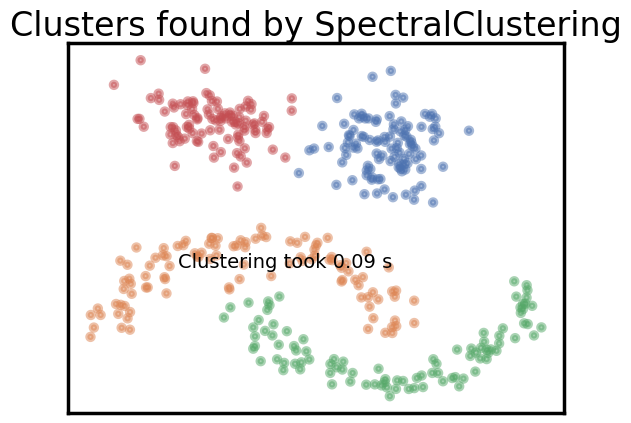

In [125]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters': 4, 'gamma': 25.0})